In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt

## 1. Load Train Set

In [5]:
params_dir = "config/config.yaml"

In [6]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [7]:
params = load_params(params_dir)

In [8]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

In [9]:
dataset = pd.concat([x_train, y_train], axis = 1)

In [10]:
dataset

,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9933,First Class,JK-15205,Pharmacy-275,Pharmacy,Indonesia,Jawa Timur-295,Jawa Timur,Jawa,PH-10004912,Diabet,Diabet/D,Diabet/DPH-10004912,164.850,3.0,0.00,47.8065
7911,Standard Class,RD-19720,Pharmacy-388,Pharmacy,Indonesia,Jawa Barat-191,Jawa Barat,Jawa,BO-10001337,Respi,Respi/A,Respi/ABO-10001337,205.666,2.0,0.15,-12.0980
309,Second Class,BP-11185,Hospital-44,Hospital,Indonesia,Kalimantan Selatan-535,Kalimantan Selatan,Kalimantan,FU-10001918,Respi,Respi/C,Respi/CFU-10001918,15.136,4.0,0.20,3.5948
4911,Standard Class,BH-11710,Pharmacy-3,Pharmacy,Indonesia,Daerah Yogyakarta-78,Daerah Yogyakarta,Jawa,PH-10001924,Diabet,Diabet/D,Diabet/DPH-10001924,111.984,2.0,0.20,6.9990
6265,Standard Class,AT-10735,Pharmacy-137,Pharmacy,Indonesia,Daerah Yogyakarta-69,Daerah Yogyakarta,Jawa,PA-10000141,Hyper,Hyper/G,Hyper/GPA-10000141,3.488,2.0,0.20,1.1772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,Standard Class,ME-17725,Pharmacy-139,Pharmacy,Indonesia,Nusa Barat-15,Nusa Barat,Bali Nusa,BI-10000962,Hyper,Hyper/C,Hyper/CBI-10000962,48.810,3.0,0.00,23.9169
7763,Standard Class,FO-14305,Pharmacy-203,Pharmacy,Indonesia,Nusa Timur-23,Nusa Timur,Bali Nusa,EN-10003286,Hyper,Hyper/D,Hyper/DEN-10003286,74.520,9.0,0.00,35.0244
5218,Standard Class,LC-16930,Hospital-4,Hospital,Indonesia,Jawa Timur-279,Jawa Timur,Jawa,AR-10001868,Hyper,Hyper/B,Hyper/BAR-10001868,8.400,5.0,0.00,4.2000
1346,Standard Class,BN-11515,Pharmacy-102,Pharmacy,Indonesia,Kalimantan Timur-551,Kalimantan Timur,Kalimantan,PA-10000466,Hyper,Hyper/G,Hyper/GPA-10000466,47.180,7.0,0.00,23.5900


## 2. EDA

C:\Users\PT RHP\AppData\Local\Temp\ipykernel_12992\2008402793.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot =True)


<Axes: >

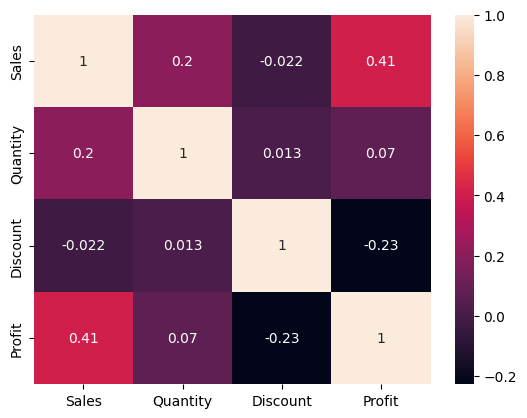

In [11]:
sns.heatmap(dataset.corr(), annot =True)

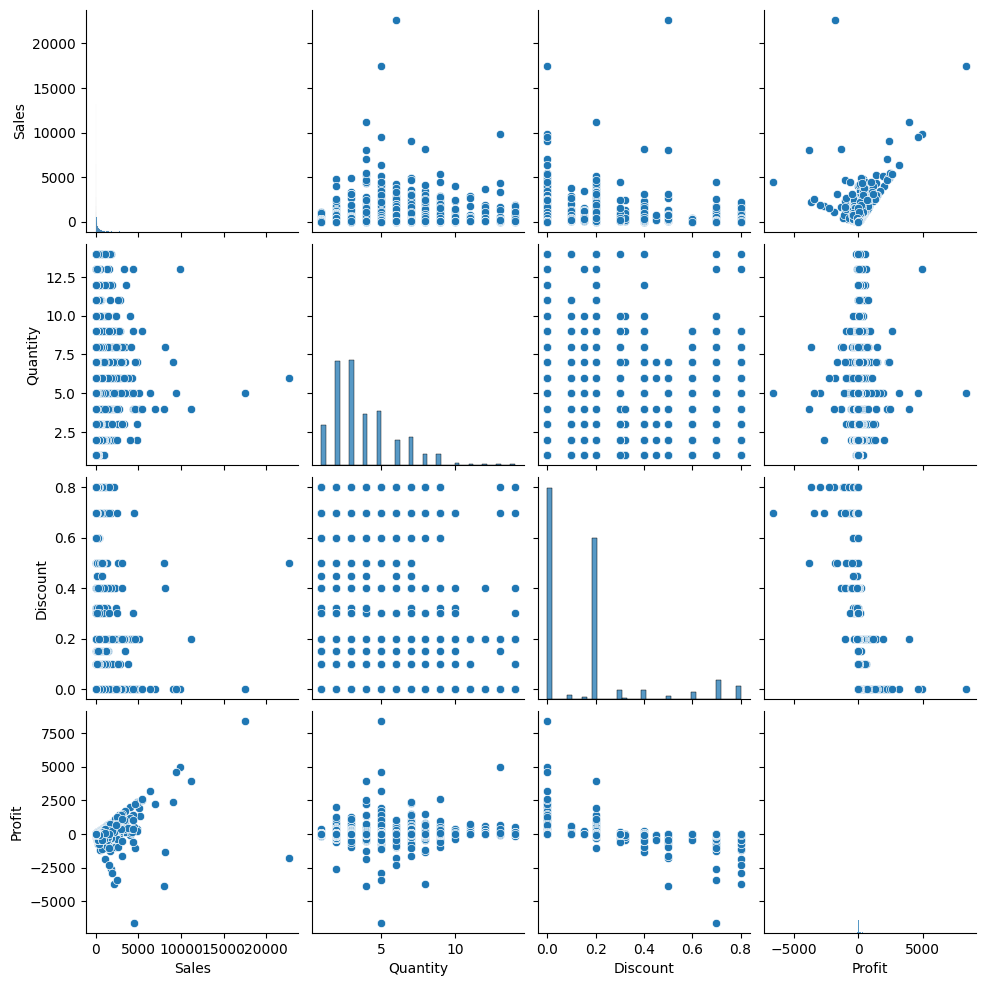

In [13]:
sns.pairplot(dataset)

In [14]:
print("Mean Profit:", round(dataset['Profit'].mean()))

print("Median Profit:", round(dataset['Profit'].median()))

print("Highest Profit:", round(dataset['Profit'].max()))

print("Lowest Profit:", round(dataset['Profit'].min()))

Mean Profit: 27
Median Profit: 9
Highest Profit: 8400
Lowest Profit: -6600


Text(0.5, 1.0, 'Category vs Profit')

<Figure size 640x480 with 0 Axes>

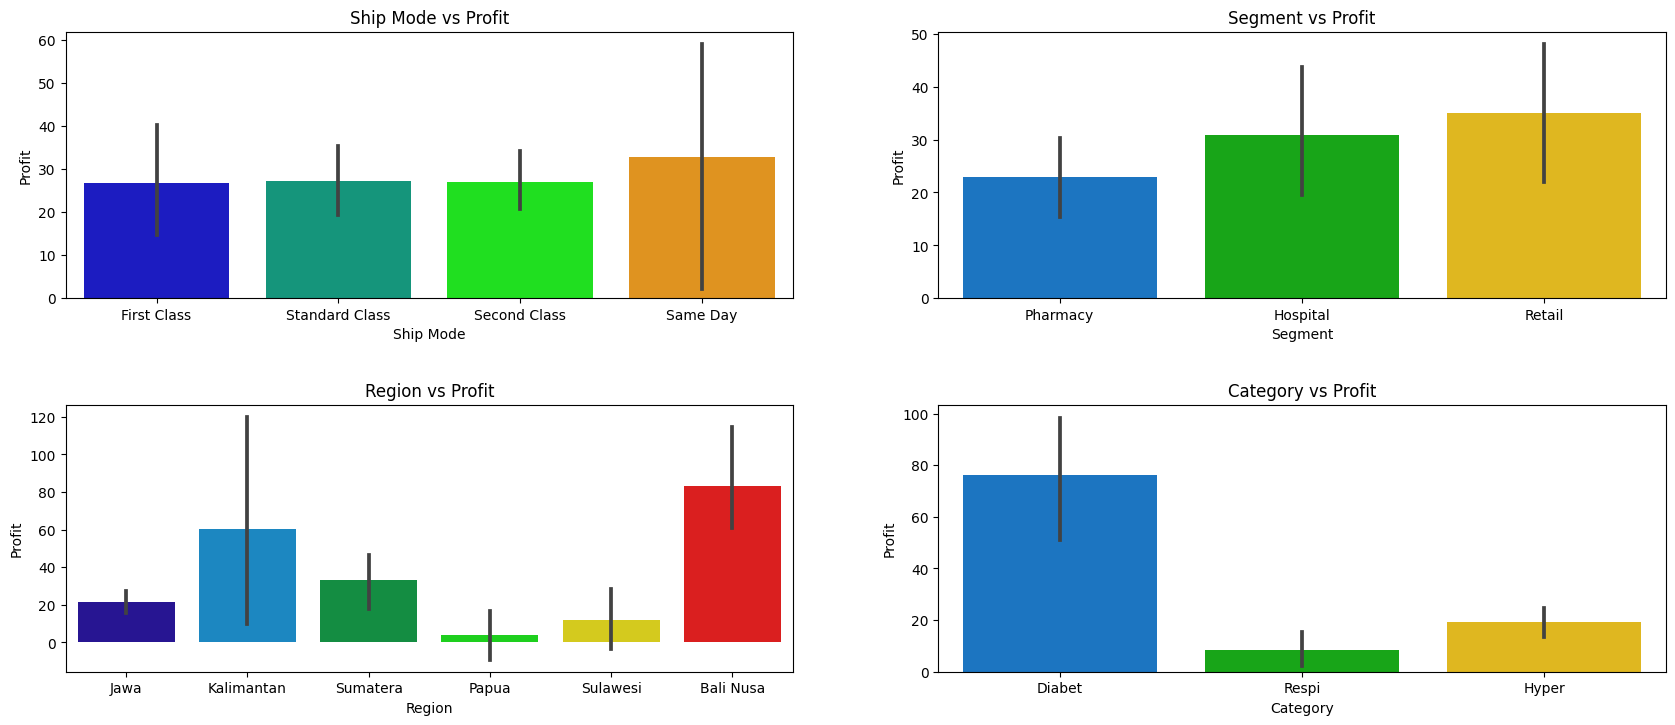

In [15]:
plt.figure(1)
plt.figure(figsize = (20, 8))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
# Column (Ship Mode vs Profit)
plt.subplot(221)
sns.barplot(x = dataset['Ship Mode'], y = dataset['Profit'], palette = "nipy_spectral")
plt.title('Ship Mode vs Profit')
# Column (Segment vs Profit)
plt.subplot(222)
sns.barplot(x = dataset['Segment'], y = dataset['Profit'], palette = "nipy_spectral")
plt.title('Segment vs Profit')
# Column (Region vs Profit)
plt.subplot(223)
sns.barplot(x = dataset['Region'], y = dataset['Profit'], palette = "nipy_spectral")
plt.title('Region vs Profit')
# Column (Category vs Profit)
plt.subplot(224)
sns.barplot(x = dataset['Category'], y = dataset['Profit'], palette = "nipy_spectral")
plt.title('Category vs Profit')